In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Compare Logistic Regression vs Decision Tree 

In [5]:
new_data = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]].copy()

In [14]:
new_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1


In [7]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
new_data["Embarked"] = le.fit_transform(new_data["Embarked"])


In [31]:
le1 = LabelEncoder()
new_data["Age"] = le1.fit_transform(new_data["Age"])


In [32]:
new_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [33]:
x = new_data.iloc[:,:-1]
y = new_data["Survived"]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression 

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lr.score(x_train,y_train)*100 ,lr.score(x_test,y_test)*100

(80.19662921348315, 81.00558659217877)

# Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
dt.score(x_train,y_train)*100  , dt.score(x_test,y_test)*100

(98.03370786516854, 79.3296089385475)

# confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [67]:
cf = confusion_matrix(y_test,lr.predict(x_test))
cf

array([[90, 15],
       [19, 55]])

In [49]:
pf = precision_score(y_test,lr.predict(x_test))*100
pf

78.57142857142857

In [50]:
rs = recall_score(y_test,lr.predict(x_test))*100
rs

74.32432432432432

In [51]:
fs = f1_score(y_test,lr.predict(x_test))*100
fs

76.38888888888889

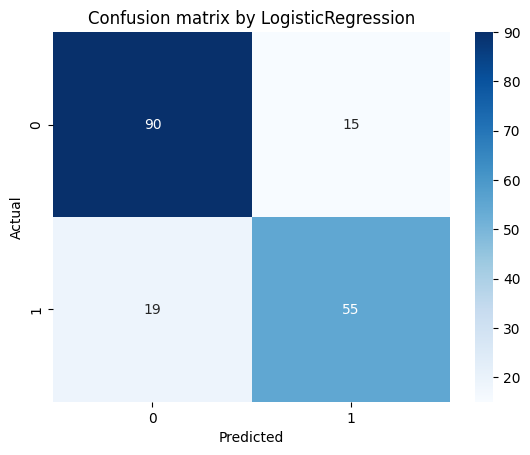

In [68]:
sns.heatmap(cf,annot=True,cmap = "Blues")
plt.title("Confusion matrix by LogisticRegression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
cf1 = confusion_matrix(y_test,dt.predict(x_test))
cf1

array([[86, 19],
       [18, 56]])

In [52]:
pf1 = precision_score(y_test,dt.predict(x_test))*100
pf1

74.66666666666667

In [53]:
rs1 = recall_score(y_test,dt.predict(x_test))*100
rs1

75.67567567567568

In [54]:
fs1 = f1_score(y_test,dt.predict(x_test))*100
fs1

75.16778523489933

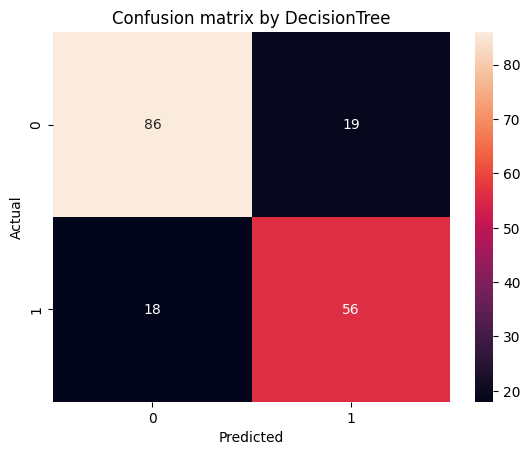

In [66]:
sns.heatmap(cf1,annot = True)
plt.title("Confusion matrix by DecisionTree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Show the top 5 most important features for: Decision Tree , logistic regression

In [71]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [72]:
ss = SequentialFeatureSelector(dt,k_features = 5,forward = True)
ss.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=(5, 5),
                          scoring='accuracy')

In [73]:
ss.feature_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [75]:
ss.k_feature_names_

('Pclass', 'Sex', 'Parch', 'Fare', 'Embarked')

In [76]:
ss.k_score_

np.float64(0.8069926558282594)

In [77]:
ss1 = SequentialFeatureSelector(lr,k_features = 5,forward = True)
ss1.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [78]:
ss1.feature_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [79]:
ss1.k_feature_names_

('Pclass', 'Sex', 'SibSp', 'Parch', 'Fare')

In [80]:
ss1.k_score_

np.float64(0.7946017199171427)